In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import calmap

In [2]:
conn = sqlite3.connect('/Users/Charlotte/Documents/Code/Bristol_homeless_hackathon/web_app/charity_app/db.sqlite3')
cur = conn.cursor()

# get the day of the week (Sunday = 0) and the hour of the day that the items were given out for a particular charity
charity_name = "Soup Run Trust"

cur.execute('''SELECT strftime('%w',time) AS Day, strftime('%H',time) AS Hour, COUNT(1) AS Count
    FROM record_record
    WHERE charity = ?
    GROUP BY Day, Hour
    ''', (charity_name,))

# put the hours and days into lists - use pandas dataframe?
days = []
hours = []
count = []
rows = cur.fetchall()
for row in rows:
    days.append(int(row[0]))
    hours.append(int(row[1]))
    count.append(int(row[2]))
    
cur.close()
conn.close()

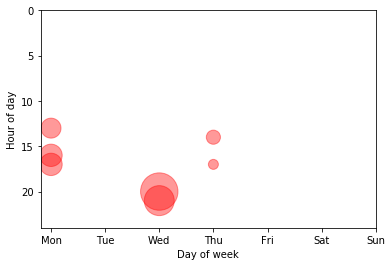

In [3]:
plt.scatter(days, hours, s = [i*100 for i in count], c="red", alpha=0.4)
plt.ylabel("Hour of day")
plt.xlabel("Day of week")
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.ylim(bottom =24, top = 0)
plt.show()

In [4]:
conn = sqlite3.connect('/Users/Charlotte/Documents/Code/Bristol_homeless_hackathon/web_app/charity_app/db.sqlite3')
charity_name = "Soup Run Trust"
query = '''SELECT strftime('%w',time) AS Day, strftime('%H',time) AS Hour, COUNT(1) AS Count
    FROM record_record
    WHERE charity = (?)
    GROUP BY Day, Hour
    '''

df = pd.read_sql_query(query, conn, params=(charity_name,))
df[["Day", "Hour"]] = df[["Day", "Hour"]].astype(int)

print(df.head())
df.dtypes

   Day  Hour  Count
0    1    13      4
1    1    16      5
2    1    17      5
3    3    20     14
4    3    21      9


Day      int64
Hour     int64
Count    int64
dtype: object

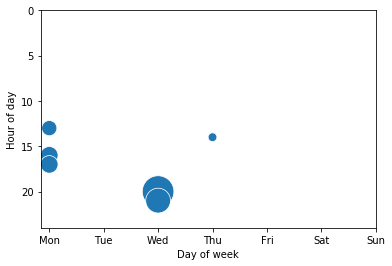

In [5]:
sns.scatterplot(x="Day", y="Hour", size="Count", data=df, sizes=(0, 1000), legend=False)
plt.ylabel("Hour of day")
plt.xlabel("Day of week")
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.ylim(bottom =24, top =0)
plt.show()

In [121]:
conn = sqlite3.connect('/Users/Charlotte/Documents/Code/Bristol_homeless_hackathon/web_app/charity_app/db.sqlite3')
charity_name = "Soup Run Trust"
query = '''SELECT strftime('%Y-%m-%d', time) AS Date, COUNT(1) AS Count
    FROM record_record
    WHERE charity = (?)
    GROUP BY Date
    '''

df = pd.read_sql_query(query, conn, params=(charity_name,))
df.head()
#df.dtypes
df["Date"] = df["Date"].astype(numpy)

# print(df.head())

# sns.scatterplot(x="Month", y="Day", size="Count", data=df, sizes=(0, 1000), legend=False)
# # plt.ylabel("Hour of day")
# # plt.xlabel("Day of week")
# plt.xticks(np.arange(1, 13, 1), ["Jan", "Feb", "Mar", "Apr", "May"])
# # plt.ylim(bottom =24, top =0)
# plt.show()

,Date,Count
0,2020-02-05,23
1,2020-02-13,2
2,2020-02-20,1
3,2020-02-24,4


<class 'numpy.datetime64'>


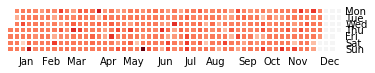

In [6]:
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
print(type(days[0]))
events = pd.Series(np.random.randn(len(days)), index=days)

events.dtypes
#events.head()

calmap.yearplot(events, year=2015)